In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [247]:
html_page = requests.get('https://freebeacon.com/author/washington-free-beacon-editors/')

In [248]:
soup = BeautifulSoup(html_page.content, 'html.parser')

In [249]:
#soup.prettify

In [250]:
links = soup.findAll('div', class_='postcard-item')

In [251]:
#for link in links:
#    print(link.findAll('h3')[0].find('a').attrs['href'])

In [252]:
soup.find('a',class_='next page-numbers')

<a class="next page-numbers" href="https://freebeacon.com/author/washington-free-beacon-editors/page/2/">Next »</a>

In [253]:
allLinks = []
for counter in range(1,8):
    page = "https://freebeacon.com/author/washington-free-beacon-editors/page/" + str(counter) + "/"
    print(page)
    html_page = requests.get(page)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    links = soup.findAll('div', class_='postcard-item')
    for link in links:
        allLinks.append(link.findAll('h3')[0].find('a').attrs['href'])

https://freebeacon.com/author/washington-free-beacon-editors/page/1/
https://freebeacon.com/author/washington-free-beacon-editors/page/2/
https://freebeacon.com/author/washington-free-beacon-editors/page/3/
https://freebeacon.com/author/washington-free-beacon-editors/page/4/
https://freebeacon.com/author/washington-free-beacon-editors/page/5/
https://freebeacon.com/author/washington-free-beacon-editors/page/6/
https://freebeacon.com/author/washington-free-beacon-editors/page/7/


In [254]:
#len(allLinks)

In [255]:
html_page = requests.get(sample)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [256]:
s = soup.find('div', class_="article-content")
allP = s.findAll('p')
for p in allP:
    if p.text.startswith('Published under:'):
        continue
    print(p.text)

President Joe Biden began his coronavirus speech on Thursday by pledging to clear up confusion about the persistent coronavirus pandemic. Count it another promise broken.
"This is a pandemic of the unvaccinated," Biden said, before lambasting the unvaccinated for putting the vaccinated at risk. He went on: The vaccinated may need boosters, but they are extremely well-protected against hospitalization and death. And the vaccines work, but masking is more important than ever, so much so that the Transportation Security Administration will double its fine on travelers who refuse to wear them.
While Biden made a token effort to persuade the unvaccinated to get their shots, it turns out they won’t have much choice in the matter. Biden announced an ambitious—and quite possibly unconstitutional—plan to mandate vaccination for all businesses with over 100 employees.
The speech reaffirmed what’s been obvious since July, when the Delta variant sent cases soaring. The Biden team has no clear conc

In [257]:
import pandas as pd
textArray = []
for link in allLinks:
    html_page = requests.get(link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    article = soup.find('article')
    parts = article.findAll('p')
    text =""
    for part in parts:
        if part.text.startswith('Published under:'):
            continue
        text += part.text
    textArray.append(text)

In [258]:
len(textArray)

70

In [259]:
textArray[0]

'The president has yet to clarify what victory over the pandemic looks likeSHAREPresident Joe Biden began his coronavirus speech on Thursday by pledging to clear up confusion about the persistent coronavirus pandemic. Count it another promise broken."This is a pandemic of the unvaccinated," Biden said, before lambasting the unvaccinated for putting the vaccinated at risk. He went on: The vaccinated may need boosters, but they are extremely well-protected against hospitalization and death. And the vaccines work, but masking is more important than ever, so much so that the Transportation Security Administration will double its fine on travelers who refuse to wear them.While Biden made a token effort to persuade the unvaccinated to get their shots, it turns out they won’t have much choice in the matter. Biden announced an ambitious—and quite possibly unconstitutional—plan to mandate vaccination for all businesses with over 100 employees.The speech reaffirmed what’s been obvious since July

In [260]:
df = pd.DataFrame(textArray, columns=['article'])

In [261]:
df['label'] = 'right'

In [262]:
df

,article,label
0,The president has yet to clarify what victory ...,right
1,"SHARETo hear President Joe Biden tell it, the ...",right
2,SHAREThe mainstream media's honeymoon with Pre...,right
3,"The ""Squad"" makes a demand for which there is ...",right
4,The restraint crowd delivers America's humilia...,right
...,...,...
65,SHAREPresident Donald Trump's announcement tha...,right
66,What liberal doomsayers miss about our all-Ame...,right
67,SHAREA New York Times report this week critici...,right
68,"On coronavirus, the president is listening to ...",right


In [263]:
df.to_csv('data/test.csv', index=False)

In [264]:
html_page = requests.get('https://www.americanthinker.com/articles/2021/09/')

In [265]:
soup = BeautifulSoup(html_page.content, 'html.parser')

In [266]:
allTitles = []
for i in range(1,10):
    page = "https://www.americanthinker.com/articles/2021/0" + str(i) + "/"
    html_page = requests.get('https://www.americanthinker.com/articles/2021/09/')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    s= soup.find('div', class_ = "articles_archive")
    allTitles += s.findAll('a', class_ ="title")

In [267]:
links = []
site = """https://www.americanthinker.com"""
for title in allTitles:
    links.append(site + title.attrs['href'])

In [268]:
len(links)

1188

In [269]:
links[0]

'https://www.americanthinker.com/articles/2021/09/can_xi_jinping_defeat_bidenled_america.html'

In [270]:
import re

In [271]:
textArray = []
for link in links:
    html_page = requests.get(link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    v = soup.find('div', class_ = "article_body")
    allParts = v.findAll('p')
    text =""
    for part in allParts:
        if part.text.startswith('To comment,'):
            continue
        elif part.text.startswith('Image:'):
            continue
        elif part.text.startswith(auth):
            continue
        if part.find('strong'):
            continue
        t = part.text
        text += re.sub('\xa0', '', t) 
    textArray.append(text)


In [272]:
len(textArray)

1188

In [273]:
textArray[22]

'On May 10, 1940, German Nazi forces invaded the Netherlands, Luxembourg, and Belgium, all of which were occupied by the end of the month.Then the Germans on May 14 burst through the Ardennes, moving quickly west and north toward the English Channel.Allied counterattacks failed to halt the German attack, which reached the coastline on May 20.The Nazis had cut off the north tip of France from the rest of the country, so Allied troops were stranded.The Allies had lost the battle for France, in which Britain had suffered 68,000 casualties.British and Allied forces had retreated to the area around the French seaport of Dunkirk, and military leaders suggested they be evacuated to Britain.Winston Churchill, who had become prime minister on May 13, at first opposed evacuation but quickly decided that it was the only right policy.Surprisingly, and still largely inexplicable, Adolf Hitler had ordered a halt on May 23 of Panzer divisions toward Dunkirk.The tanks went ahead on May 26.\n\nOut of a

In [274]:
df = pd.DataFrame(textArray, columns=['article'])

In [275]:
df['label'] = 'right'

In [276]:
df

,article,label
0,Look at it from Xi Jinping’s perspective. The ...,right
1,I recently had a conversation with a reasonabl...,right
2,"Be it your personal or professional situation,...",right
3,"A74-year-old womanlies on her back, writhing i...",right
4,After years of pretending the Chinese Communis...,right
...,...,...
1183,The catastrophic implications of the incompete...,right
1184,Protests against Critical Race Theory (CRT) ar...,right
1185,California parole commissioners have recommend...,right
1186,If you take the time to piece together the puz...,right


In [277]:
df2 = pd.read_csv('data/test.csv')

In [278]:
df2 

,article,label
0,The president has yet to clarify what victory ...,right
1,"SHARETo hear President Joe Biden tell it, the ...",right
2,SHAREThe mainstream media's honeymoon with Pre...,right
3,"The ""Squad"" makes a demand for which there is ...",right
4,The restraint crowd delivers America's humilia...,right
...,...,...
65,SHAREPresident Donald Trump's announcement tha...,right
66,What liberal doomsayers miss about our all-Ame...,right
67,SHAREA New York Times report this week critici...,right
68,"On coronavirus, the president is listening to ...",right


In [281]:
df2.append(df).to_csv('data/test.csv', index=False)

# NEW SECTION 

In [3]:
sample = "https://www.huffpost.com/news/politics"
html_page = requests.get(sample)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [4]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en"><head><meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0" name="viewport"/><meta charset="utf-8"/><title>Politics</title><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"80e7eedc19","applicationID":"820302374","applicationTime":12.993649,"transactionName":"YQdTZhAEDEoAVUMMDFhNdEoSFwdKElxESiRzNh4dWAEHSRUeWwwFUx5fVxUWHlAMRlYGF0oHX0YHFxZYCFhaAA1CHkddCwYHSkgZDRYPQwU=","queueTime":0,"ttGuid":"160f6f14841e1572","agentToken":null}; (window.NREUM||(NREUM={})).loader_config={licenseKey:"80e7eedc19",applicationID:"820302374"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length

In [13]:
ms = soup.findAll('div', class_ = 'card card--standard js-card')

In [14]:
links = []
for m in ms:
    links.append(m.find('a', class_='card__image__link').attrs['href'])

In [16]:
len(links)

10

In [19]:
next_link  = soup.find('a', class_='pagination__next-link').attrs['href']

In [30]:
main_link = "https://www.huffpost.com/news/politics?page="

In [33]:
links = []
for page in range(1,36):
    current_link = main_link + str(page)
    html_page = requests.get(current_link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    ms = soup.findAll('div', class_ = 'card card--standard js-card')
    for m in ms:
        links.append(m.find('a', class_='card__image__link').attrs['href'])

In [34]:
len(links)

348

In [81]:
textArray = []
bad_links =[
    "https://www.huffpost.com/entry/trump-money-recipients_n_614c8fa5e4b03dd7280801ca",
    "https://www.huffpost.com/entry/manchin-biden-west-virginia-child-care-hcbs-poverty_n_614e2e70e4b03dd7280afa11",
    "https://www.huffpost.com/entry/steve-marino-mari-manoogian-protection-order_n_61490f29e4b0175a18354533",
    "https://www.huffpost.com/entry/caregiving-funding-cut-democrats-house_n_6132d9ade4b04778c0052765",
    "https://www.huffpost.com/entry/islamophobia-ground-zero-mosque-cordoba-house_n_613b87bce4b09519c50452bd",
    "https://www.huffpost.com/entry/income-poverty-health-insurance-2020_n_6140c56fe4b00ff836f2aa0a",
    "https://www.huffpost.com/entry/gavin-newsom-california-recall-real-threat-democrats_n_613fd807e4b09519c508721a",
    "https://www.huffpost.com/entry/trump-aides-building-afganistan-refugee-opposition_n_6141e1fbe4b0640100acbc8f",
    "https://www.huffpost.com/entry/california-recall-newsom-election_n_61417135e4b09519c50b7047",
    "https://www.huffpost.com/entry/wisconsin-senate-mandela-barnes-ron-johnson_n_613fcb46e4b0628d095f220b",
    "https://www.huffpost.com/entry/donald-trump-election-officials-rigged-election-2024_n_6146764ee4b0d9b6de9761c5",
    "https://www.huffpost.com/entry/alan-braid-texas-abortion-violation-duty-of-care_n_61466361e4b0e5dd4b27704c",
    "https://www.huffpost.com/entry/democrats-spending-bill-labor-unions_n_614b561fe4b0e5dd4b2f2e02",
    "https://www.huffpost.com/entry/us-set-to-admit-lowest-ever-number-of-refugees-this-fiscal-year_n_614b63dfe4b077b735ee65dd",
    "https://www.huffpost.com/entry/us-special-envoy-to-haiti-resigns-over-migrant-expulsions_n_614c7f70e4b00164119101a3",
    "https://www.huffpost.com/entry/georgia-voting-rights-democracy-jim-crow_n_6143cc4be4b08f5f38aeb8fb"
]
for l in links:
    if l in bad_links :
        continue
    html_page = requests.get(l)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    es = soup.findAll('div', class_='content-list-component yr-content-list-text text')
    text = ""
    print(l)
    for e in es:
        t = e.find('p').text
        t = t.replace(u'\xa0', u' ')
        text += t
    textArray.append(text)

https://www.huffpost.com/entry/debt-limit-default-republicans_n_6151de24e4b03d83bad65371
https://www.huffpost.com/entry/noem-daughter-meeting-real-estate_n_61522d95e4b06beda47306f0
https://www.huffpost.com/entry/child-tax-credit-delay_n_6151c711e4b01dff4b706718
https://www.huffpost.com/entry/knoxville-school-canceled-anti-mask-protest_n_6151def0e4b01dff4b70c164
https://www.huffpost.com/entry/unemployment-benefits-bill-reconciliation_n_6151f547e4b01dff4b710ac8
https://www.huffpost.com/entry/emmanuel-macron-hit-by-egg_n_6151f548e4b0016411978c6c
https://www.huffpost.com/entry/child-tax-credit-joe-manchin_n_615219e5e4b03d83bad6d5cc
https://www.huffpost.com/entry/bc-us-congress-budget_n_61519cece4b03dd7280d6625
https://www.huffpost.com/entry/sean-spicer-donald-trump-mediaite_n_615216efe4b03d83bad6d1d3
https://www.huffpost.com/entry/us-la-mayor-karen-bass-congress_n_615217e3e4b098483a79b77f
https://www.huffpost.com/entry/chris-wallace-texas-rape-greg-abbott-abortion_n_615103bce4b03d83bad4a93

https://www.huffpost.com/entry/alphonso-david-human-rights-campaign-andrew-cuomo_n_6136d726e4b0f1b97064e9f4
https://www.huffpost.com/entry/demand-justice-supreme-court-expansion_n_61390131e4b0df9fe27ecf76
https://www.huffpost.com/entry/civil-rights-groups-lawsuits-texas-voting-law_n_6137ac0de4b04778c00ac652
https://www.huffpost.com/entry/adlai-stevenson-iii-dead-dies_n_6138080de4b04778c00b1256
https://www.huffpost.com/entry/civil-rights-groups-lawsuits-texas-voting-law_n_6137ac0de4b04778c00ac652
https://www.huffpost.com/entry/demand-justice-supreme-court-expansion_n_61390131e4b0df9fe27ecf76
https://www.huffpost.com/entry/irs-tax-gap-joe-biden-enforcement_n_61391592e4b05f53edb05fc1
https://www.huffpost.com/entry/biden-requiring-federal-workers-to-get-covid-sho_n_613a0d72e4b0dda4cbcb7561
https://www.huffpost.com/entry/tripwire-john-gibson-texas-abortion_n_6136ee0ae4b0df9fe27a468c
https://www.huffpost.com/entry/indiana-abortion-law-telemedicine_n_613a2548e4b0628d09588257
https://www.huffp

https://www.huffpost.com/entry/capitol-rally-jan-6_n_6140a3fde4b09519c509fce9
https://www.huffpost.com/entry/manchin-work-requirement-child-tax-credit_n_6140e95de4b0dda4cbd4f97e
https://www.huffpost.com/entry/republicans-anti-vaccine-base-economy_n_61412afbe4b09519c50b2c9d
https://www.huffpost.com/entry/newsom-recall-outcome-covid_n_61437bc7e4b0b6160546bbb3
https://www.huffpost.com/entry/manchin-work-requirement-child-tax-credit_n_6140e95de4b0dda4cbd4f97e
https://www.huffpost.com/entry/simone-biles-aly-raisman-fbi-larry-nassar_n_61423686e4b0ab42329f5c91
https://www.huffpost.com/entry/donald-mary-trump-sept-11-cermonies_n_613eae49e4b09519c5063125
https://www.huffpost.com/entry/donald-trump-new-911-claim-firefighters_n_6139abe8e4b00ff836e868c0
https://www.huffpost.com/entry/republicans-anti-vaccine-base-economy_n_61412afbe4b09519c50b2c9d
https://www.huffpost.com/entry/newsom-recall-outcome-covid_n_61437bc7e4b0b6160546bbb3
https://www.huffpost.com/entry/larry-kudlow-donald-trump-calmness_

https://www.huffpost.com/entry/chris-wallace-fox-pete-ricketts-covid-mandatory-vaccines_n_613e9220e4b090b79e856235
https://www.huffpost.com/entry/jersey-city-rental-aid-application_n_61488c87e4b00171833e955f
https://www.huffpost.com/entry/paula-jones-american-crime-story-portrayal_n_6140e835e4b0dda4cbd4f7a9
https://www.huffpost.com/entry/beto-o-rourke-texas-governor_n_6147f600e4b00171833d5e8c
https://www.huffpost.com/entry/tucker-carlson-nicki-minaj-cousin-covid-19-vaccine_n_61419ee7e4b0dda4cbd5d7d6
https://www.huffpost.com/entry/trump-boeing-757-air-force-one-paint-job_n_6146d428e4b00171833c9620
https://www.huffpost.com/entry/chris-wallace-trump-brain-rent-free_n_614814bbe4b00171833d7859
https://www.huffpost.com/entry/supreme-court-hear-mississippi-abortion-case_n_6148b63fe4b0efa77f836675
https://www.huffpost.com/entry/paula-jones-american-crime-story-portrayal_n_6140e835e4b0dda4cbd4f7a9
https://www.huffpost.com/entry/chris-wallace-trump-brain-rent-free_n_614814bbe4b00171833d7859
http

In [87]:
df = pd.DataFrame(textArray, columns=['article'])

In [88]:
df['label'] = 'left'

In [89]:
df.head()

,article,label
0,Senate Republicans blocked a House-passed bill...,left
1,"SIOUX FALLS, S.D. (AP) — Just days after a Sou...",left
2,The Internal Revenue Service failed to send ch...,left
3,"Classes at public schools in Knoxville, Tennes...",left
4,Democrats are watering down their ambitions to...,left


In [90]:
df2 = pd.read_csv('data/test.csv')

In [91]:
df2.append(df).to_csv('data/test.csv', index=False)

# New Section

In [210]:
sample = "https://slate.com/news-and-politics"
html_page = requests.get(sample)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [224]:
al = soup.find('div',class_="topic-stories-list")

In [229]:
rs= al.findAll('a', class_='topic-story')

In [230]:
links = []
for r in rs:
    links.append(r.attrs['href'])

In [236]:
main_link = "https://slate.com/news-and-politics/"
links = []
for i in range(1,40):
    current_link = main_link + str(i)
    html_page = requests.get(current_link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    al = soup.find('div',class_="topic-stories-list")
    rs= al.findAll('a', class_='topic-story')
    for r in rs:
        links.append(r.attrs['href'])

In [237]:
len(links)

780

In [239]:
l = links[89]

In [240]:
html_page = requests.get(l)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [241]:
t = soup.find('div', class_='article__content')

In [244]:
ts = t.findAll('p', class_='slate-paragraph slate-graf')

In [247]:
text = "".join([i.text for i in ts])

In [252]:
textArray = []
for l in links:
    html_page = requests.get(l)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    t = soup.find('div', class_='article__content')
    if t is None:
        continue
    ts = t.findAll('p', class_='slate-paragraph slate-graf')
    text = "".join([i.text for i in ts])
    textArray.append(text)

In [253]:
textArray[0]

'Mississippi Attorney General Lynn Fitch wants to “empower” American women by abolishing their constitutional right to an abortion.\xa0In an interview Thursday with Eternal Word Television Network, the Republican attorney general explained that outlawing abortion will help women who are forced to birth children, giving them “a chance to really redirect their lives.” These women “have all these new and different opportunities” that did not exist when Roe came down in 1973, Fitch said. And so, according to Fitch, Dobbs v. Jackson Women’s Health Organization, the upcoming Supreme Court case that could overturn Roe v. Wade, will not be a tragedy but a blessing.*This argument crops up in Mississippi’s Dobbs brief, in which Fitch claimed that women simply do not need abortion access any longer. “Numerous laws enacted since Roe—addressing pregnancy discrimination, requiring leave time, assisting with childcare, and more—facilitate the ability of women to pursue both career success and a rich 

In [254]:
textArray = [t.replace(u'\xa0', u' ') for t in textArray]

In [255]:
textArray[0]

'Mississippi Attorney General Lynn Fitch wants to “empower” American women by abolishing their constitutional right to an abortion. In an interview Thursday with Eternal Word Television Network, the Republican attorney general explained that outlawing abortion will help women who are forced to birth children, giving them “a chance to really redirect their lives.” These women “have all these new and different opportunities” that did not exist when Roe came down in 1973, Fitch said. And so, according to Fitch, Dobbs v. Jackson Women’s Health Organization, the upcoming Supreme Court case that could overturn Roe v. Wade, will not be a tragedy but a blessing.*This argument crops up in Mississippi’s Dobbs brief, in which Fitch claimed that women simply do not need abortion access any longer. “Numerous laws enacted since Roe—addressing pregnancy discrimination, requiring leave time, assisting with childcare, and more—facilitate the ability of women to pursue both career success and a rich fam

In [256]:
df = pd.DataFrame(textArray, columns=['article'])
df['label'] = 'left'
df.head()

,article,label
0,Mississippi Attorney General Lynn Fitch wants ...,left
1,"On May 10, 2011, then President Barack Obama g...",left
2,"Texas politics is a rough business, and recent...",left
3,"The problems at Rikers Island, New York City’s...",left
4,"If it’s late September, that means it’s probab...",left


In [257]:
df2 = pd.read_csv('data/test.csv')
df2.append(df).to_csv('data/test.csv', index=False)

# NEW SECTION 

In [5]:
sample = "https://news.gallup.com/Search/raw.aspx??s=date&p=2&topic=1&cn=POLITICS?"
html_page = requests.get(sample)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [6]:
soup.prettify

<bound method Tag.prettify of 
<section class="cmstile tile-feature type-release" data-tileid="353012-POLL"><div class="tile-inner">
<div class="image image-source">
<img alt="" class="b-lazy img-responsive" data-src="https://content.gallup.com/origin/gallupinc/GallupSpaces/Production/Cms/POLL/g2gyqkejx0-xzkyh0xzs0q.png" height="300" src="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" style="max-height:300px;" width="300"/><noscript><img alt="" height="300" src="https://content.gallup.com/origin/gallupinc/GallupSpaces/Production/Cms/POLL/g2gyqkejx0-xzkyh0xzs0q.png" width="300"/></noscript>
</div>
<div class="meta clearfix"><div class="topic"><a href="/topic/politics.aspx">Politics</a></div><time datetime="2021-07-30">Jul 30, 2021</time></div><div class="copy">
<div class="tile-linktext"><h3 data-overflow="ellipsis"><a href="/poll/353012/coronavirus-ticks-important-problem.aspx" onclick="ga('send', 'event', '', 'https://news.gallup.com/Search/raw.aspx', 'Cor

In [56]:
topics =[
    "https://news.gallup.com/Search/raw.aspx??s=date&p={n}&topic=1&cn=POLITICS?",
    "https://news.gallup.com/Search/raw.aspx??s=date&p={n}&topic=1&cn=ECONOMY?",
    "https://news.gallup.com/Search/raw.aspx??s=date&p={n}&topic=1&cn=WORLD_REGION_WORLDWIDE?"
]

In [63]:
links =[]
for i in range(1,11):
    for topic in topics:
        topic = topic.replace('{n}', str(i))
        sample = topic.format(i)
        html_page = requests.get(sample)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        main_link = "https://news.gallup.com"
        sections = soup.findAll('section', class_='cmstile tile-feature type-release')
        for section in sections:
            link = section.find('div', class_='tile-linktext').find('a').attrs['href']
            links.append(main_link+link)


https://news.gallup.com/Search/raw.aspx??s=date&p=1&topic=1&cn=POLITICS?
https://news.gallup.com/Search/raw.aspx??s=date&p=1&topic=1&cn=ECONOMY?
https://news.gallup.com/Search/raw.aspx??s=date&p=1&topic=1&cn=WORLD_REGION_WORLDWIDE?
https://news.gallup.com/Search/raw.aspx??s=date&p=2&topic=1&cn=POLITICS?
https://news.gallup.com/Search/raw.aspx??s=date&p=2&topic=1&cn=ECONOMY?
https://news.gallup.com/Search/raw.aspx??s=date&p=2&topic=1&cn=WORLD_REGION_WORLDWIDE?
https://news.gallup.com/Search/raw.aspx??s=date&p=3&topic=1&cn=POLITICS?
https://news.gallup.com/Search/raw.aspx??s=date&p=3&topic=1&cn=ECONOMY?
https://news.gallup.com/Search/raw.aspx??s=date&p=3&topic=1&cn=WORLD_REGION_WORLDWIDE?
https://news.gallup.com/Search/raw.aspx??s=date&p=4&topic=1&cn=POLITICS?
https://news.gallup.com/Search/raw.aspx??s=date&p=4&topic=1&cn=ECONOMY?
https://news.gallup.com/Search/raw.aspx??s=date&p=4&topic=1&cn=WORLD_REGION_WORLDWIDE?
https://news.gallup.com/Search/raw.aspx??s=date&p=5&topic=1&cn=POLITICS?

In [65]:
print(links)

['https://news.gallup.com/poll/355073/vaccinated-delta-surge-fda-decision.aspx', 'https://news.gallup.com/opinion/gallup/354938/adults-estimates-covid-hospitalization-risk.aspx', 'https://news.gallup.com/poll/354983/majority-supports-biden-covid-vaccine-mandates.aspx', 'https://news.gallup.com/opinion/polling-matters/354929/five-questions-views-business-industry-sectors.aspx', 'https://news.gallup.com/poll/354950/germans-may-ready-change-merkel-exits.aspx', 'https://news.gallup.com/poll/354908/approval-supreme-court-down-new-low.aspx', 'https://news.gallup.com/poll/354872/biden-approval-rating-hits-new-low-harris.aspx', 'https://news.gallup.com/poll/354833/estimated-million-pay-needed-drugs.aspx', 'https://news.gallup.com/opinion/polling-matters/354770/biden-challenge-vaccine-mandates.aspx', 'https://news.gallup.com/poll/354638/approval-interracial-marriage-new-high.aspx', 'https://news.gallup.com/poll/354566/americans-ratings-cdc-communication-turn-negative.aspx', 'https://news.gallup

In [79]:
len(links)

426

In [112]:
bad_links = [
    "https://news.gallup.comhttps://www.gallup.com/workplace/350201/europe-workplace-trends.aspx",
    "www.gallup.com/workplace/339842/decades-low-engagement-germany-turn-around.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/339842/decades-low-engagement-germany-turn-around.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/347156/capitalism-need-soul-transplant.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/317681/remote-work-outcomes-depend-manager.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/315839/why-employees-feel-agile-leaders.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/316472/customers-next.aspx",
    "https://news.gallup.comhttps://www.gallup.com/workplace/312833/why-leaders-need-build-trust-employees.aspx"
]

In [113]:
textArray = []
n = 25
for j in range(0,17):
    #for k in range(0,100000000):
    #    continue
    for i in range(j*n,(j+1)*n):
        link = links[i]
        if link in bad_links:
            continue
        print(link)
        html_page = requests.get(link)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        text = "".join([t.text for t in soup.find('div', class_='article-content').findAll('p')])
        textArray.append(text)

https://news.gallup.com/poll/355073/vaccinated-delta-surge-fda-decision.aspx
https://news.gallup.com/opinion/gallup/354938/adults-estimates-covid-hospitalization-risk.aspx
https://news.gallup.com/poll/354983/majority-supports-biden-covid-vaccine-mandates.aspx
https://news.gallup.com/opinion/polling-matters/354929/five-questions-views-business-industry-sectors.aspx
https://news.gallup.com/poll/354950/germans-may-ready-change-merkel-exits.aspx
https://news.gallup.com/poll/354908/approval-supreme-court-down-new-low.aspx
https://news.gallup.com/poll/354872/biden-approval-rating-hits-new-low-harris.aspx
https://news.gallup.com/poll/354833/estimated-million-pay-needed-drugs.aspx
https://news.gallup.com/opinion/polling-matters/354770/biden-challenge-vaccine-mandates.aspx
https://news.gallup.com/poll/354638/approval-interracial-marriage-new-high.aspx
https://news.gallup.com/poll/354566/americans-ratings-cdc-communication-turn-negative.aspx
https://news.gallup.com/poll/354506/update-american-pu

https://news.gallup.com/opinion/gallup/347090/eve-summit-americans-view-japan-positively.aspx
https://news.gallup.com/opinion/gallup/339827/happiness-survive-covid-pandemic.aspx
https://news.gallup.com/poll/337886/republicans-drive-drop-positivity-global-standing.aspx
https://news.gallup.com/poll/336947/tunisia-revolution-failed-deliver-economic-promises.aspx
https://news.gallup.com/opinion/gallup/330539/afghanistan-women-futures-hang-balance.aspx
https://news.gallup.com/poll/352793/americans-split-whether-afghanistan-war-mistake.aspx
https://news.gallup.com/opinion/polling-matters/352739/measuring-presidential-job-approval-years.aspx
https://news.gallup.com/poll/352733/biden-approval-drops-lowest-date.aspx
https://news.gallup.com/poll/352664/americans-remain-divided-preferred-immigration-levels.aspx
https://news.gallup.com/poll/352544/larger-majority-says-racism-against-black-people-widespread.aspx
https://news.gallup.com/poll/352457/ratings-black-white-relations-new-low.aspx
https://

https://news.gallup.com/poll/327563/four-indicators-watch-covid-economic-recovery.aspx
https://news.gallup.com/poll/327596/americans-practicing-strict-social-distancing.aspx
https://news.gallup.com/poll/327362/small-business-owners-optimism-rises-below-pre-covid.aspx
https://news.gallup.com/poll/327701/merkel-set-leave-office-germany-top-world.aspx
https://news.gallup.com/poll/327629/biden-inherits-battered-image-abroad.aspx
https://news.gallup.com/opinion/gallup/327104/new-global-index-ranks-perceptions-stress.aspx
https://news.gallup.com/poll/325715/political-economic-strife-takes-emotional-toll-lebanese.aspx
https://news.gallup.com/opinion/gallup/324509/measure-makes-life-worth-living.aspx
https://news.gallup.com/opinion/gallup/323894/world-risk-poll-provides-compass-sdg-road-map.aspx
https://news.gallup.com/opinion/gallup/323744/medical-community-success-against-covid-hinges-trust.aspx
https://news.gallup.com/poll/323480/britons-approval-leadership-new-low.aspx
https://news.gallup.

https://news.gallup.com/opinion/gallup/296594/trust-government-lacking-frontlines-covid.aspx
https://news.gallup.com/poll/339977/biden-approval-ratings-diverge-gender-education-race.aspx
https://news.gallup.com/poll/337457/new-high-perceptions-china-greatest-enemy.aspx
https://news.gallup.com/poll/337886/republicans-drive-drop-positivity-global-standing.aspx
https://news.gallup.com/opinion/polling-matters/337406/new-era-big-government.aspx
https://news.gallup.com/poll/335567/vaccinated-americans-making-less-effort-social-distance.aspx
https://news.gallup.com/poll/332417/leadership-ratings-pandemic-one-year.aspx
https://news.gallup.com/poll/331952/americans-evolving-views-economy-amid-pandemic.aspx
https://news.gallup.com/poll/330530/u.s.-nine-woman-leading-u.s.-years.aspx
https://news.gallup.com/poll/330524/eastern-europe-women-already-leading-ready.aspx
https://news.gallup.com/poll/330521/sub-saharan-africa-give-education-opportunities-women.aspx
https://news.gallup.com/poll/330518/la

https://news.gallup.com/poll/328289/americans-foresee-biden-improving-environment-education.aspx
https://news.gallup.com/poll/328268/country-living-enjoys-renewed-appeal.aspx
https://news.gallup.com/opinion/gallup/328250/looking-back-world-2020-forward-2021.aspx
https://news.gallup.com/opinion/gallup/328202/gallup-top-findings-2020.aspx
https://news.gallup.com/poll/328193/donald-trump-michelle-obama-admired-2020.aspx
https://news.gallup.com/poll/316223/fewer-say-important-parents-married.aspx
https://news.gallup.com/poll/328136/ethics-ratings-rise-medical-workers-teachers.aspx
https://news.gallup.com/poll/328106/public-mood-sours-satisfied-approve-trump.aspx
https://news.gallup.com/opinion/polling-matters/328034/partisanship-vaccine-uptake-strategies.aspx
https://news.gallup.com/poll/327968/reduced-majority-critical-healthcare-system.aspx
https://news.gallup.com/poll/327701/merkel-set-leave-office-germany-top-world.aspx
https://news.gallup.com/poll/327629/biden-inherits-battered-image-

In [114]:
df = pd.DataFrame(textArray, columns=['article'])
df['label'] = 'center'
df.head()

,article,label
0,"WASHINGTON, D.C. -- The percentage of U.S. adu...",center
1,The American public's understanding of the eff...,center
2,"WASHINGTON, D.C. -- Americans generally approv...",center
3,Americans' top-of-mind views of 25 U.S. busine...,center
4,"WASHINGTON, D.C. -- Germans' ratings of their ...",center


In [115]:
df2 = pd.read_csv('data/test.csv')
df2.append(df).to_csv('data/test.csv', index=False)

# NEW SECTION 

In [2]:
sample = "https://www.cbsnews.com/latest/politics/1/"
html_page = requests.get(sample)
soup = BeautifulSoup(html_page.content, 'html.parser')


In [28]:
links = []
for i in range(1,71):
    curr_main_link = "https://www.cbsnews.com/latest/politics/" + str(i) +"/"
    html_page = requests.get(curr_main_link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    links.append(soup.find('a', class_='item__anchor').attrs['href'])
    articles = soup.findAll('article', class_="item lazyload item--type-article item--topic-politics")
    for article in articles:
        links.append(article.find('a', class_='item__anchor').attrs['href'])
    

In [29]:
len(links)

850

In [53]:
textArray = []
for link in links:
    html_page = requests.get(link)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    ps = soup.find('section',class_='content__body').findAll('p')
    text = "".join([p.text.replace(u'\xa0', u' ')  for p in ps])
    textArray.append(text)

In [54]:
textArray[3]


'Senate Majority Leader Chuck Schumer announced Wednesday night that an agreement to keep the government funded and prevent a government shutdown has been reached."We have an agreement on the C.R. — the continuing resolution — to prevent a government shutdown, and we should be voting on that tomorrow morning," he said on the Senate floor. The majority leader said he hopes to hold a vote on final passage by midday — hours before government funding would have run out, at midnight Thursday.The short-term government funding bill would keep federal agencies operating through December 3, but it does not address the looming deadline to raise the debt ceiling to avoid U.S. default. The bill includes $6.3 billion for relocation efforts for Afghan refugees, as well as $28.6 billion for disaster assistance following a spate of devastating hurricanes and wildfires. Once the bill passes in the Senate, the House will take it up, so it can then be sent to President Biden to sign before government fun

In [55]:
df = pd.DataFrame(textArray, columns=['article'])
df['label'] = 'center'
df.head()

,article,label
0,Washington — The Supreme Court on Thursday sai...,center
1,Washington — The Supreme Court on Thursday sai...,center
2,Washington – House Democrats have taken Presid...,center
3,Senate Majority Leader Chuck Schumer announced...,center
4,Washington — The Supreme Court is slated to re...,center


In [56]:
df2 = pd.read_csv('data/test.csv')
df2.append(df).to_csv('data/test.csv', index=False)

In [2]:
df = pd.read_csv('data/test.csv')

In [3]:
df.shape

(3492, 2)

In [5]:
import matplotlib.pyplot as plt

In [12]:
df['len']=df['article'].apply(lambda x: len(x. split(" ")))

<AxesSubplot:>

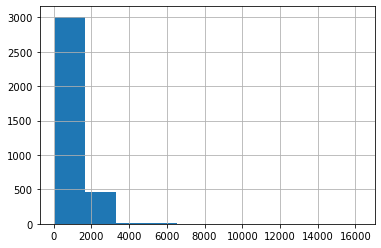

In [14]:
df.len.hist()